In [1]:
import pandas as pd

#Read CSV/Excel into DataFrame and inspect head/tail/types.

In [4]:
   df = pd.read_csv("/content/student_performance.csv")
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [5]:
print(df.tail())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]


In [6]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


# Compute summary stats (mean, median, min, max, count)

In [7]:
df[['G1', 'G2', 'G3']].mean()


,0
G1,11.399076
G2,11.570108
G3,11.906009


In [8]:
df[['G1', 'G2', 'G3']].median()


,0
G1,11.0
G2,11.0
G3,12.0


In [9]:
df.groupby('Walc')['G3'].mean()


,G3
Walc,
1,12.360324
2,12.260000
3,11.666667
4,11.034483
5,10.555556


In [10]:
df[['G1', 'G2', 'G3']].mean().mean()

np.float64(11.62506420133539)

In [11]:
df.count()

,0
school,649
sex,649
age,649
address,649
famsize,649
Pstatus,649
Medu,649
Fedu,649
Mjob,649
Fjob,649


#Filter rows, select columns and slice subsets.

In [12]:
dffil = df[['school', 'sex', 'age', 'G1', 'G2', 'G3']]


In [13]:
dffil.insert(0, 'student_id', range(0, len(df)))

In [24]:
dffil.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   G1          649 non-null    int64 
 5   G2          649 non-null    int64 
 6   G3          649 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 35.6+ KB


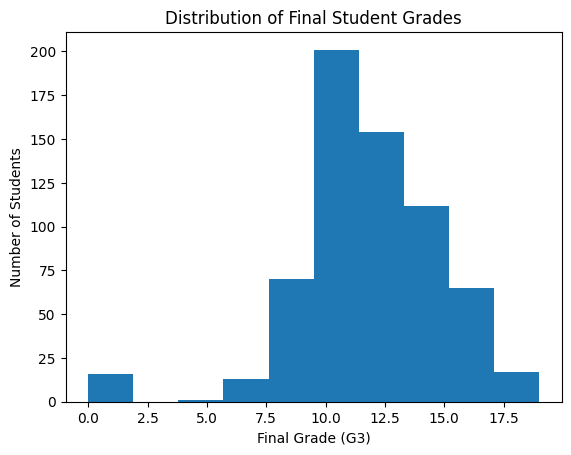

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['G3'], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Student Grades")
plt.show()

In [16]:
import seaborn as sns


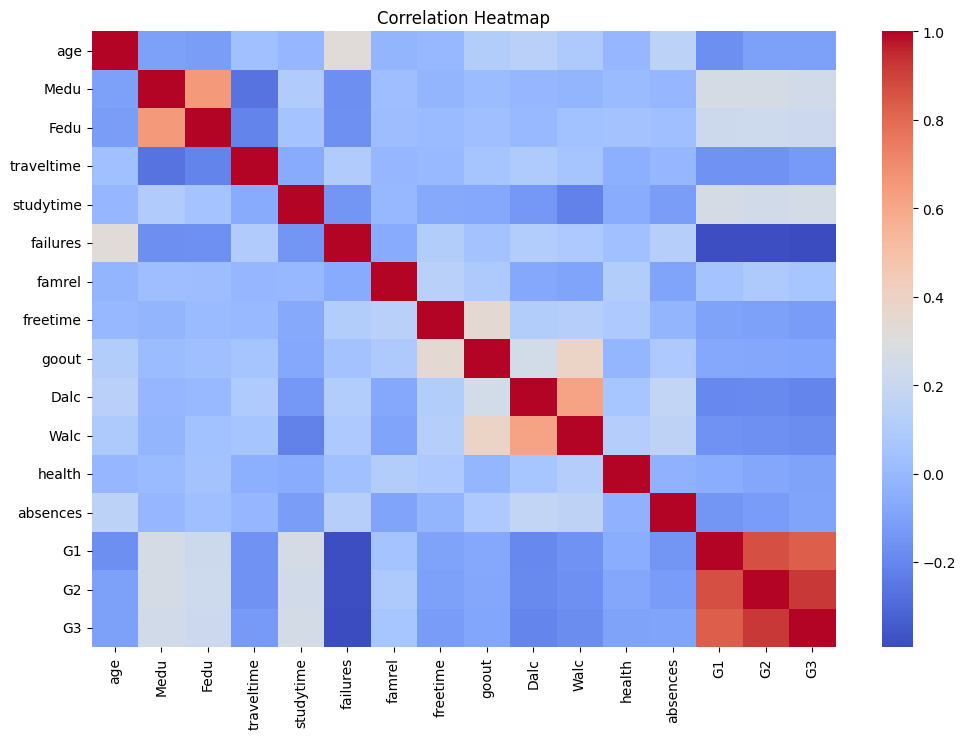

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


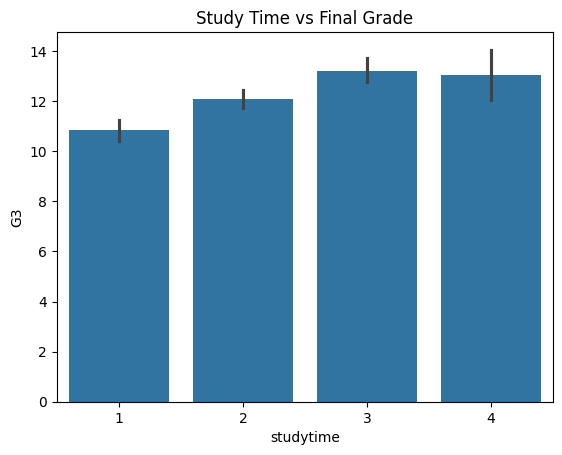

In [18]:
sns.barplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()


In [19]:
top_3_refined = df.sort_values(by=['G3', 'G2', 'G1'], ascending=False).head(3)
print(top_3_refined)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
338     GP   F   17       R     LE3       T     3     1  services    other   
636     MS   M   18       U     GT3       T     4     4   teacher  teacher   
332     GP   F   18       U     GT3       T     2     2   at_home  at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
338  ...      3        1      2     1     1      3        0  18  19  19  
636  ...      3        2      4     1     4      2        4  17  18  19  
332  ...      4        3      3     1     2      2        0  18  18  18  

[3 rows x 33 columns]


In [20]:
df.iloc[0:10, 0:4]

,school,sex,age,address
0,GP,F,18,U
1,GP,F,17,U
2,GP,F,15,U
3,GP,F,15,U
4,GP,F,16,U
5,GP,M,16,U
6,GP,M,16,U
7,GP,F,17,U
8,GP,M,15,U
9,GP,M,15,U


In [21]:
df_18 = df[ df['age'] >= 18 ]

In [22]:
df_18.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,0,9,10,11
131,GP,F,18,U,GT3,T,2,1,services,other,...,5,4,5,1,3,5,10,10,9,8
142,GP,M,18,U,LE3,T,3,1,services,services,...,3,3,4,4,5,4,2,11,11,12
143,GP,F,18,U,GT3,A,3,2,other,services,...,4,3,3,5,1,5,10,12,11,11


#Save filtered results to CSV/excel.

In [23]:
top_students = df[df['G3'] > 14]
top_students.to_csv("top_students.csv", index=False)
